# Задача 1

In [4]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

### Генератор случайной матрицы $n \times m$

In [5]:
def random_matrix(n, m, lower=0, upper=1):
    return sps.uniform.rvs(size=(n, m), loc=lower, scale=(upper - lower))

random_matrix(2, 3, -5, 5)

array([[ 4.18041069, -3.0137213 , -2.41349558],
       [-0.28711824, -1.65109554, -0.43169239]])

### Генератор случайной диагональной матрицы 

In [6]:
def random_diagonal(n, lower=0, upper=1):
    return np.diag(sps.uniform.rvs(size=n, loc=lower, scale=(upper - lower)))

random_diagonal(5)

array([[0.02277234, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.91217055, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.63965575, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.42220692, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.81813188]])

### Генератор случайной верхней треугольной матрицы

In [7]:
def random_upper_triangle(n, lower=0, upper=1):
    return np.triu(random_matrix(n, n, lower=lower, upper=upper))
                   
random_upper_triangle(5, -3, 3)

array([[-0.82526363,  0.96831414,  2.92335461, -1.02311957,  2.24731878],
       [ 0.        , -0.49884477, -1.64680183, -1.16149654, -2.84298923],
       [ 0.        ,  0.        , -2.8365639 , -1.39781463, -0.36182325],
       [ 0.        ,  0.        ,  0.        , -1.35203765,  1.14878708],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.98601722]])

### Генератор случайной нижней треугольной матрицы

In [8]:
def random_lower_triangle(n, lower=0, upper=1):
    return random_upper_triangle(n, lower=lower, upper=upper).T

random_lower_triangle(5, -2, 2)

array([[ 1.15887385,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.27739078,  1.03580284,  0.        ,  0.        ,  0.        ],
       [-0.24350279, -0.77931443, -0.15626549,  0.        ,  0.        ],
       [ 1.48213307, -0.98144057,  1.12430285, -0.86794061,  0.        ],
       [-1.71969113,  1.052852  ,  0.89492731,  1.00441228,  1.86123497]])

### Генератор случайной симметричной матрицы

In [9]:
def random_symmetrical(n, lower=0, upper=1):
    x = random_matrix(n, n, lower=lower, upper=upper)
    return((x + x.T) / 2)

random_symmetrical(5)

array([[0.90365976, 0.60983663, 0.59820126, 0.24629581, 0.13472527],
       [0.60983663, 0.08383242, 0.20069317, 0.32078639, 0.69026174],
       [0.59820126, 0.20069317, 0.65460954, 0.68143596, 0.42196579],
       [0.24629581, 0.32078639, 0.68143596, 0.67042756, 0.19606417],
       [0.13472527, 0.69026174, 0.42196579, 0.19606417, 0.86766903]])

### Генератор случайной вырожденной матрицы

In [52]:
def random_degenerate(n, lower=0, upper=1):
    x = random_matrix(n, n, lower=lower, upper=upper)
    # заменым k-ый столбец линейной комбинацией других столбцов
    k = sps.randint(0, n).rvs()
    x[:, k] *= 0
    distr = sps.uniform().rvs(n - 1)
    weights = distr / sum(distr)
    x[:, k] = np.delete(x, (k), axis=1) @ weights.T
    return x
    

r = random_degenerate(6)
print(r)
print("det == 0:", np.allclose(np.linalg.det(r), 0))

[[0.08882765 0.49774011 0.54293588 0.48290431 0.65357435 0.6978239 ]
 [0.84382531 0.5551607  0.94179192 0.67778289 0.27190797 0.52621928]
 [0.59990668 0.85520594 0.57723614 0.95365525 0.99724371 0.89145267]
 [0.86946847 0.39962459 0.86398391 0.76010177 0.00523303 0.21546053]
 [0.44326033 0.39657816 0.72760167 0.79260312 0.48870333 0.07834592]
 [0.44826953 0.49690061 0.07266492 0.70156142 0.00775907 0.93320374]]
det == 0: True


### Генератор матрицы $n \times m$ ступенчатого вида ранга $m$

In [115]:
def random_row_echelon(n, m, lower=0, upper=1):
    x = random_upper_triangle(n, lower=lower, upper=upper)
    # удалим n-m строк
    k = np.random.choice(np.arange(1, n), size=(n - m), replace=False)
    x = np.delete(x, k, axis=0)
    x = np.vstack((x, np.zeros((n - m, n))))
    # ленивая проверка ранга
    if np.linalg.matrix_rank(x) != m:
        return random_row_echelon(n, m, lower=lower, upper=upper)
    return x

r = random_row_echelon(100, 87)
print(r)
print(np.linalg.matrix_rank(r))

[[0.25471447 0.84675838 0.33205005 ... 0.78781843 0.08216749 0.23047661]
 [0.         0.84584739 0.13166367 ... 0.96862034 0.29160135 0.2819669 ]
 [0.         0.         0.72468298 ... 0.80459445 0.23293916 0.69125578]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
87


### Генератор матрицы возмущений $n \times m$

In [119]:
def random_perturbation(n, m, eps):
    return random_matrix(n, m, lower=-eps, upper=eps)

print(random_perturbation(5, 6, 0.1))

[[ 0.04475063  0.09309518  0.04774409  0.06285605  0.06878476  0.07828028]
 [-0.0605428   0.04008107  0.06293578  0.05644963 -0.0399297   0.09869908]
 [ 0.06842567  0.03507982 -0.0666941  -0.06823529  0.01062417 -0.07689233]
 [ 0.01053791  0.03767427 -0.0250409  -0.06899915 -0.03089686  0.08063321]
 [ 0.07876545  0.04906506  0.04394    -0.07628331  0.00684548 -0.03865419]]


Оценим вероятность генерации вырожденной матрицы возмущений.

In [132]:
N = 10000
n = 10
eps = 0.0001
count = 0
acount = 0

for _ in range(N):
    r = np.linalg.det(random_perturbation(n, n, eps))
    if np.allclose(0, r,  atol=1e-16):
        count += 1
    if r == 0.0:
        acount += 1

        
print(f"Из {N} сгенерированных матриц вырожденными оказались {count}. Вероятность = {count / N}")
print(f"Из {N} сгенерированных матриц вырожденными оказались {acount}. Вероятность = {acount / N}")

Из 10000 сгенерированных матриц вырожденными оказались 10000. Вероятность = 1.0
Из 10000 сгенерированных матриц вырожденными оказались 0. Вероятность = 0.0


**Из-за малости чисел оценить вырожденность матриы представялется сложным.**

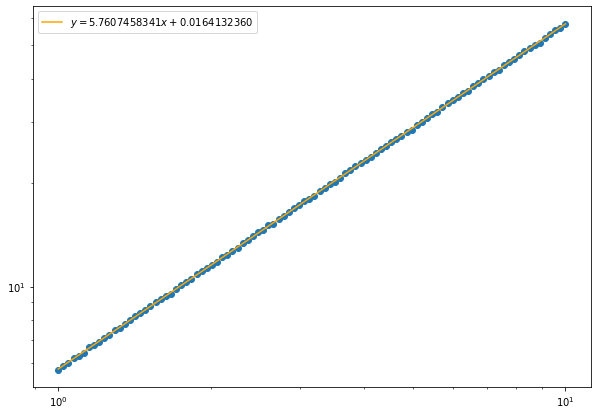

In [166]:
N = 100
M = 100
eps = np.logspace(1e-10, 1, M)
norms = np.zeros(M)
n = 10

for i in range(M):
    for _ in range(N):
        norms[i] += np.linalg.norm(random_perturbation(n, n, eps[i]))
    norms[i] /= N

plt.figure(figsize=(10, 7))
    
plt.scatter(eps, norms)
plt.xscale("log")
plt.yscale("log")

args = np.polyfit(eps, norms, 1)
plt.plot(eps, np.polyval(args, eps), color="orange", label=f"$y = {args[0]:.10f} x {args[1]:+.10f}$")
plt.legend()

Видим, что зависимость средней нормы от $\varepsilon$ прямая проходящая через ноль.  
При увеличении размера матрицы $n$ увеличиваеться наклон прямой.  
Оценим максимумы:

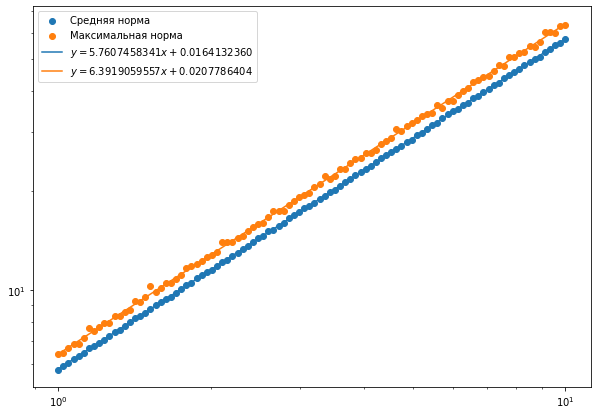

In [168]:
max_norms = np.zeros(M)

for i in range(M):
    for _ in range(N):
        max_norms[i] = max(np.linalg.norm(random_perturbation(n, n, eps[i])), max_norms[i])


plt.figure(figsize=(10, 7))
    
plt.scatter(eps, norms, label="Средняя норма")
plt.scatter(eps, max_norms, label="Максимальная норма")
plt.xscale("log")
plt.yscale("log")

args_max = np.polyfit(eps, max_norms, 1)
plt.plot(eps, np.polyval(args, eps), label=f"$y = {args[0]:.10f} x {args[1]:+.10f}$")
plt.plot(eps, np.polyval(args_max, eps), label=f"$y = {args_max[0]:.10f} x {args_max[1]:+.10f}$")
plt.legend()

Видим, что зависимость максимальной нормы от $\varepsilon$ также прямая проходящая через ноль.  
Наколн этой прямой немного больше наклона 

# Задачи 2, 3, 4

[Решение](hw_1_3_1.pdf)

# Задача 5

In [173]:
chi = 5
lambda_1 = np.arange(chi*chi).reshape((chi, chi))
lambda_2 = np.arange(chi*chi).reshape((chi, chi))
lambda_3 = np.arange(chi*chi).reshape((chi, chi))
gamma_1 = np.arange(chi ** 3).reshape((chi, chi, chi))
gamma_2 = np.arange(chi ** 3).reshape((chi, chi, chi))
U = np.arange(chi ** 4).reshape((chi, chi, chi, chi))

In [229]:
%%timeit
Z = np.einsum("ab,cbd,de,feg,gh,ijef->ahij",lambda_1, gamma_1, lambda_2, gamma_2, lambda_3, U, optimize="optimal")

3.74 ms ± 153 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [254]:
l = np.einsum("ab, cb, db->ac", lambda_1, lambda_2, lambda_3)
print(np.einsum_path("ab, cb, db->ac", lambda_1, lambda_2, lambda_3)[1])
print(np.einsum("db,ab->ab", lambda_3, lambda_1))
print(np.tensordot(lambda_3, lambda_1, axes=((0),(0))))

  Complete contraction:  ab,cb,db->ac
         Naive scaling:  4
     Optimized scaling:  3
      Naive FLOP count:  1.875e+03
  Optimized FLOP count:  5.010e+02
   Theoretical speedup:  3.743
  Largest intermediate:  2.500e+01 elements
--------------------------------------------------------------------------
scaling                  current                                remaining
--------------------------------------------------------------------------
   3                   db,ab->ab                                cb,ab->ac
   3                   ab,cb->ac                                   ac->ac
[[   0   55  120  195  280]
 [ 250  330  420  520  630]
 [ 500  605  720  845  980]
 [ 750  880 1020 1170 1330]
 [1000 1155 1320 1495 1680]]
[[ 750  800  850  900  950]
 [ 800  855  910  965 1020]
 [ 850  910  970 1030 1090]
 [ 900  965 1030 1095 1160]
 [ 950 1020 1090 1160 1230]]


In [197]:
path_info = np.einsum_path("ab,cbd,de,feg,gh,ijef->ahij",lambda_1, gamma_1, lambda_2, gamma_2, lambda_3, U, optimize="optimal")
print(path_info[0])
print(path_info[1])

['einsum_path', (0, 1), (0, 4), (0, 1), (0, 2), (0, 1)]
  Complete contraction:  ab,cbd,de,feg,gh,ijef->ahij
         Naive scaling:  10
     Optimized scaling:  5
      Naive FLOP count:  5.859e+07
  Optimized FLOP count:  1.525e+04
   Theoretical speedup:  3841.961
  Largest intermediate:  6.250e+02 elements
--------------------------------------------------------------------------
scaling                  current                                remaining
--------------------------------------------------------------------------
   4                  cbd,ab->ad                  de,feg,gh,ijef,ad->ahij
   3                   ad,de->ae                     feg,gh,ijef,ae->ahij
   4                 gh,feg->efh                        ijef,ae,efh->ahij
   5              efh,ijef->ehij                            ae,ehij->ahij
   5               ehij,ae->ahij                               ahij->ahij


Реализуем то же при помощи простых функций

In [228]:
T_1, = np.tensordot(np.sum(gamma_1, axis=0), lambda_1, axes=(0,1)),
T_2 = np.tensordot(T_1, lambda_2, axes=(1, 0))
T_3 = np.tensordot(lambda_3, gamma_2, axes=(0, 2))
T_4 = np.tensordot(T_3, np.sum(U, axis=2), axes=(1, 2))
T_5 = np.tensordot(T_4, T_2, axes=(0, 1))
T_5 == Z

array([[[[False, False, False, False, False],
         [False, False, False, False, False],
         [False, False, False, False, False],
         [False, False, False, False, False],
         [False, False, False, False, False]],

        [[False, False, False, False, False],
         [False, False, False, False, False],
         [False, False, False, False, False],
         [False, False, False, False, False],
         [False, False, False, False, False]],

        [[False, False, False, False, False],
         [False, False, False, False, False],
         [False, False, False, False, False],
         [False, False, False, False, False],
         [False, False, False, False, False]],

        [[False, False, False, False, False],
         [False, False, False, False, False],
         [False, False, False, False, False],
         [False, False, False, False, False],
         [False, False, False, False, False]],

        [[False, False, False, False, False],
         [False, False, Fa